SOGComp is SOG run for comparison with SS2DSOG5x5
- compare starting values to check initialization of IC's

In [1]:
import numpy as np
import pandas as pd
import datetime as dtm
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import netCDF4 as nc
import os
import re
import pytz

%matplotlib inline

In [2]:
def intvals(z,var):
    delz=z[1:]-z[0:-1]
    varint=np.sum(0.5*(var[1:,:]+var[0:-1,:])*np.tile(delz,(np.shape(var)[1],1)).T,0)
    return(varint)

In [3]:
filename='/data/eolson/SOG/SOG-runs/run_Base/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break

data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=82)

# Timestamp in matplotlib time
dt_num = dts.date2num(dtm.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
interval=float(interval)
# Extract dataframe chunks into dictionary

times=[]
for index, chunk in enumerate(data):
    #print(index)
    #print(np.shape(chunk))
    times.append(dts.num2date(dt_num + index*float(interval), tz=pytz.timezone('UTC')))
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
z=da[:,0,0];
DiatBase=intvals(z,da[:,4,:])*10**3 # umol N / m^2
MyriBase=intvals(z,da[:,5,:])*10**3 # umol N / m^2
NanoBase=intvals(z,da[:,6,:])*10**3 # umol N / m^2
MicZBase=intvals(z,da[:,7,:])*10**3 # umol N / m^2
nitrateBase=intvals(z,da[:,8,:])*10**3 # umol N / m^2
ammBase=intvals(z,da[:,9,:])*10**3 # umol N / m^2
SiBase=intvals(z,da[:,10,:])*10**3 # umol Si / m^2
print(field_names)

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']


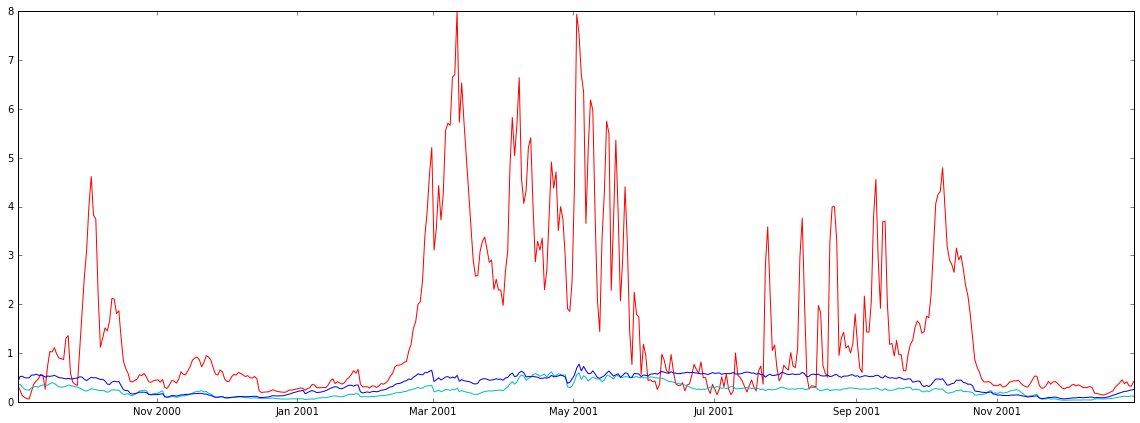

In [4]:
fig, axs = plt.subplots(1,1,figsize=(20,7))


pl0=axs.plot(times,da[1,4,:],color='r')
pl0=axs.plot(times,da[1,5,:],color='c')
pl0=axs.plot(times,da[1,6,:],color='b')


In [5]:
filename='/data/eolson/SOG/SOG-runs/run_diat/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break

data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=82)

# Timestamp in matplotlib time
dt_num = dts.date2num(dtm.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
interval=float(interval)
# Extract dataframe chunks into dictionary

times=[]
for index, chunk in enumerate(data):
    #print(index)
    #print(np.shape(chunk))
    times.append(dts.num2date(dt_num + index*float(interval), tz=pytz.timezone('UTC')))
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
        
z=da[:,0,0];
DiatDiat=intvals(z,da[:,4,:])*10**3 # umol N / m^2
MyriDiat=intvals(z,da[:,5,:])*10**3 # umol N / m^2
NanoDiat=intvals(z,da[:,6,:])*10**3 # umol N / m^2
MicZDiat=intvals(z,da[:,7,:])*10**3 # umol N / m^2
nitrateDiat=intvals(z,da[:,8,:])*10**3 # umol N / m^2
ammDiat=intvals(z,da[:,9,:])*10**3 # umol N / m^2
SiDiat=intvals(z,da[:,10,:])*10**3 # umol Si / m^2
print(field_names)

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']


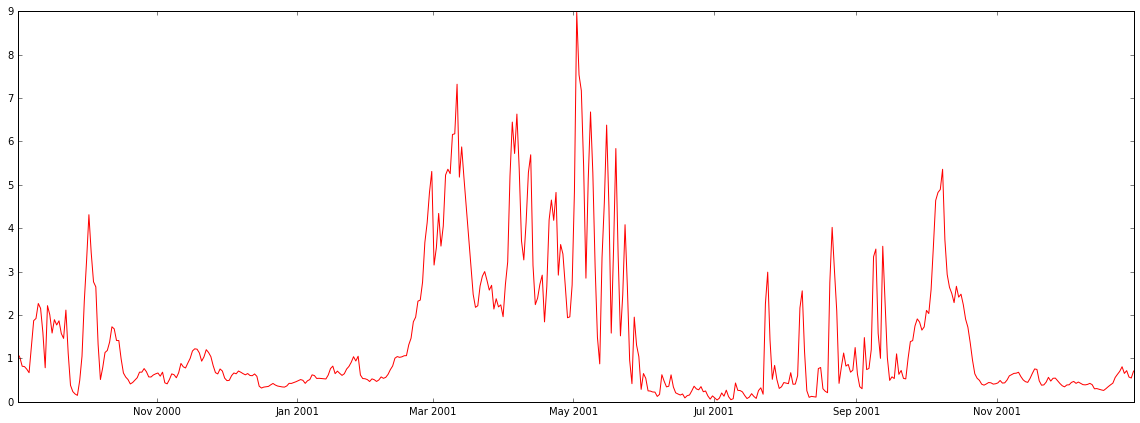

In [6]:
fig, axs = plt.subplots(1,1,figsize=(20,7))


pl0=axs.plot(times,da[1,4,:],color='r')
pl0=axs.plot(times,da[1,5,:],color='c')
pl0=axs.plot(times,da[1,6,:],color='b')

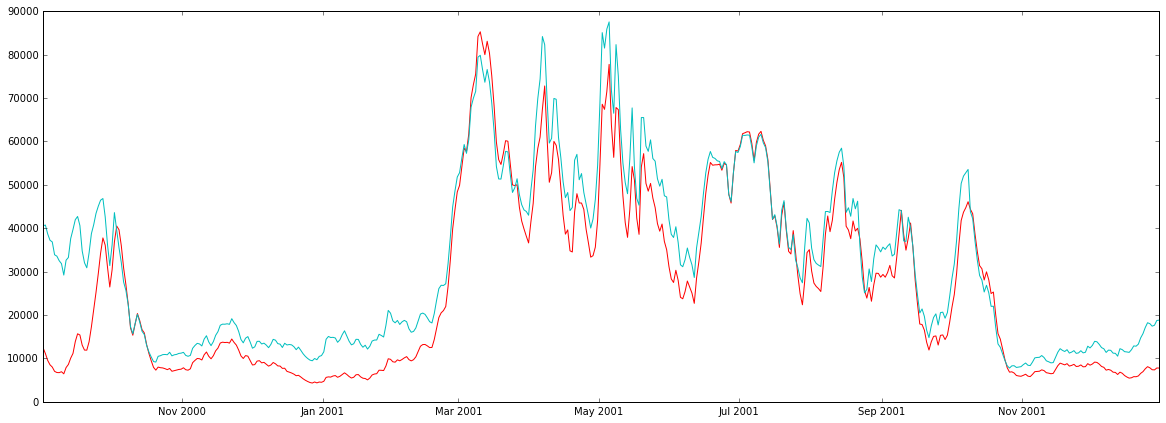

In [29]:
fig, axs = plt.subplots(1,1,figsize=(20,7))
pl0=axs.plot(times,DiatBase,color='r')
pl0=axs.plot(times,DiatDiat,color='c')

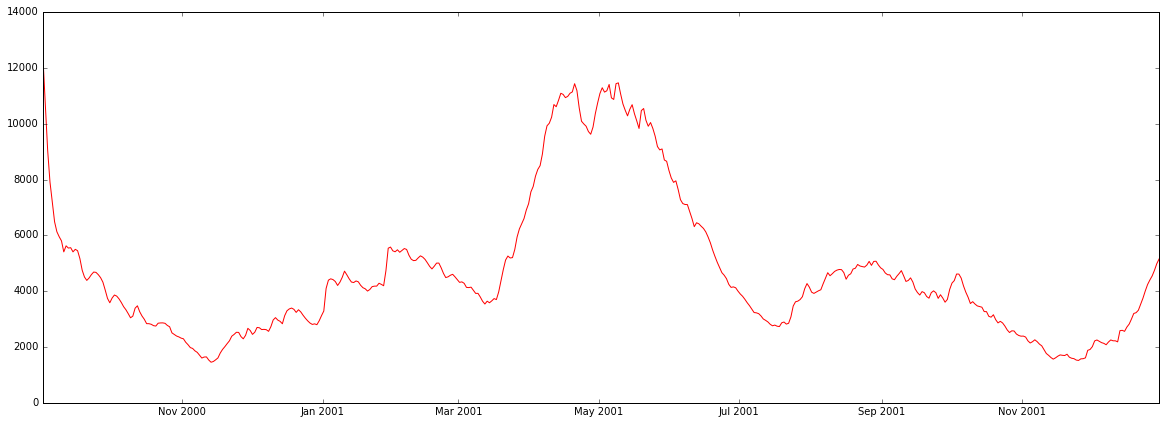

In [9]:
fig, axs = plt.subplots(1,1,figsize=(20,7))
pl0=axs.plot(times,DiatBase+MyriBase+,color='r')
pl0=axs.plot(times,MyriDiat,color='c')

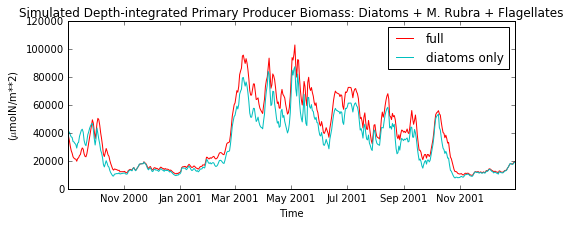

In [30]:
fig, axs = plt.subplots(1,1,figsize=(8,3))

pl0=axs.plot(times,DiatBase+MyriBase+NanoBase,color='r',label='full')
pl0=axs.plot(times,DiatDiat+MyriDiat+NanoDiat,color='c',label='diatoms only')
axs.set_title('Simulated Depth-integrated Primary Producer Biomass: Diatoms + M. Rubra + Flagellates', fontsize=12)
#cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
axs.set_xlabel('Time')
axs.set_ylabel('($\mu$molN/m**2)')
axs.legend()
fig.savefig('BiomassPP.png',dpi=200)

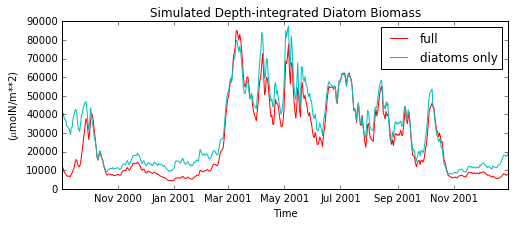

In [35]:
fig, axs = plt.subplots(1,1,figsize=(8,3))

pl0=axs.plot(times,DiatBase,color='r',label='full')
pl0=axs.plot(times,DiatDiat,color='c',label='diatoms only')
axs.set_title('Simulated Depth-integrated Diatom Biomass', fontsize=12)
#cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
axs.set_xlabel('Time')
axs.set_ylabel('($\mu$molN/m**2)')
axs.legend()
fig.savefig('DiatomsPP.png',dpi=200)

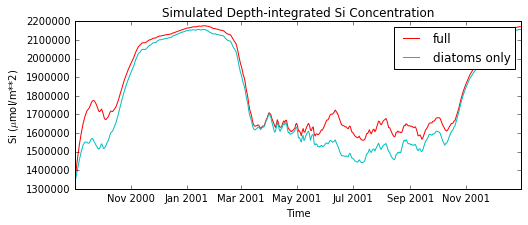

In [31]:
fig, axs = plt.subplots(1,1,figsize=(8,3))

pl0=axs.plot(times,SiBase,color='r',label='full')
pl0=axs.plot(times,SiDiat,color='c',label='diatoms only')
axs.set_title('Simulated Depth-integrated Si Concentration', fontsize=12)
#cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
axs.set_xlabel('Time')
axs.set_ylabel('Si ($\mu$mol/m**2)')
axs.legend()
fig.savefig('Si3PP.png',dpi=200)

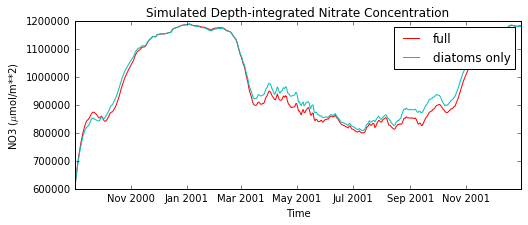

In [32]:
fig, axs = plt.subplots(1,1,figsize=(8,3))
pl0=axs.plot(times,nitrateBase,color='r',label='full')
pl0=axs.plot(times,nitrateDiat,color='c',label='diatoms only')
axs.set_title('Simulated Depth-integrated Nitrate Concentration', fontsize=12)
#cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
axs.set_xlabel('Time')
axs.set_ylabel('NO3 ($\mu$mol/m**2)')
axs.legend()
fig.savefig('BiomassPP.png',dpi=200)

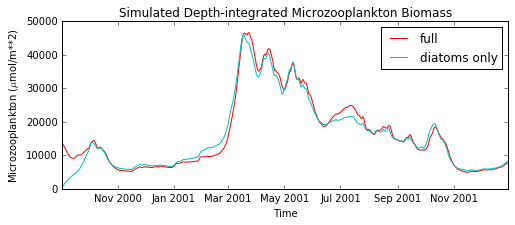

In [34]:
fig, axs = plt.subplots(1,1,figsize=(8,3))
pl0=axs.plot(times,MicZBase,color='r',label='full')
pl0=axs.plot(times,MicZDiat,color='c',label='diatoms only')
axs.set_title('Simulated Depth-integrated Microzooplankton Biomass', fontsize=12)
#cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
axs.set_xlabel('Time')
axs.set_ylabel('Microzooplankton ($\mu$mol/m**2)')
axs.legend()
fig.savefig('MicroZoPP.png',dpi=200)

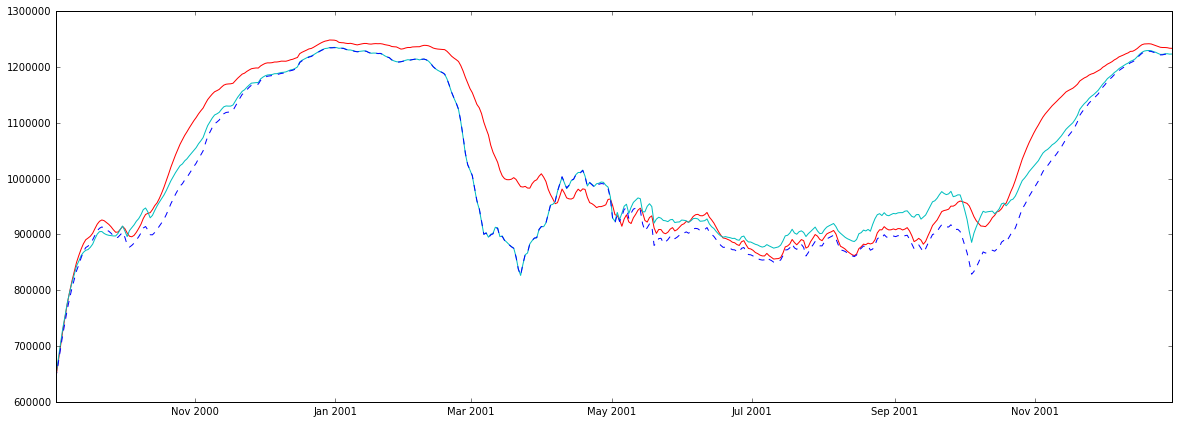

In [12]:
fig, axs = plt.subplots(1,1,figsize=(20,7))
pl0=axs.plot(times,nitrateBase+ammBase,color='r')
pl0=axs.plot(times,nitrateDiat+ammDiat,color='c')

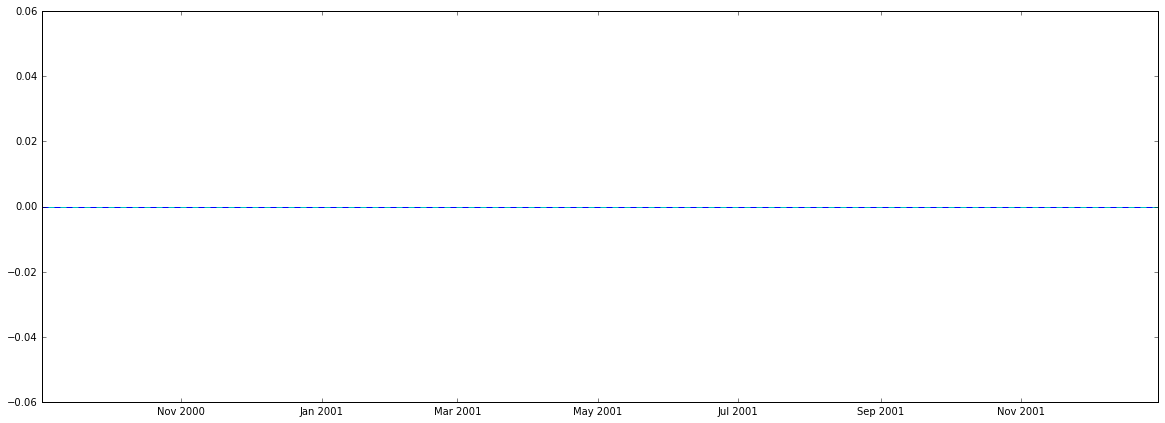

In [14]:
fig, axs = plt.subplots(1,1,figsize=(20,7))
#pl0=axs.plot(times,MicZBase,color='r')
pl0=axs.plot(times,MicZDiat,color='c')
pl0=axs.plot(times,MicZDiatflag,'b--')

In [6]:
z=da[:,0,0]
t=np.arange(da.shape[2])
t=(t+1.0)*20
tt,zz=np.meshgrid(t,-z)
    
    # Extract startdate and convert to MPL time
    dt_stamp = field_units[0].split('hr since ', 1)[1].split(' LST', 1)[0]
    dt_num   = dts.date2num(dtm.datetime.strptime(dt_stamp, '%Y-%m-%d %H:%M:%S'))
    
    # Create date dataframe and append to DATA
    date   = pd.DataFrame({'date': data['time']/24 + dt_num})

In [8]:
print( field_names)
print (t)
print(z)
print(da[:,0,1])
print(da[:,0,2])

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']
[   20.    40.    60.    80.   100.   120.   140.   160.   180.   200.
   220.   240.   260.   280.   300.   320.   340.   360.   380.   400.
   420.   440.   460.   480.   500.   520.   540.   560.   580.   600.
   620.   640.   660.   680.   700.   720.   740.   760.   780.   800.
   820.   840.   860.   880.   900.   920.   940.   960.   980.  1000.
  1020.  1040.  1060.  1080.  1100.  1120.  1140.  1160.  1180.  1200.
  1220.  1240.  1260.  1280.  1300.  1320.  1340.  13

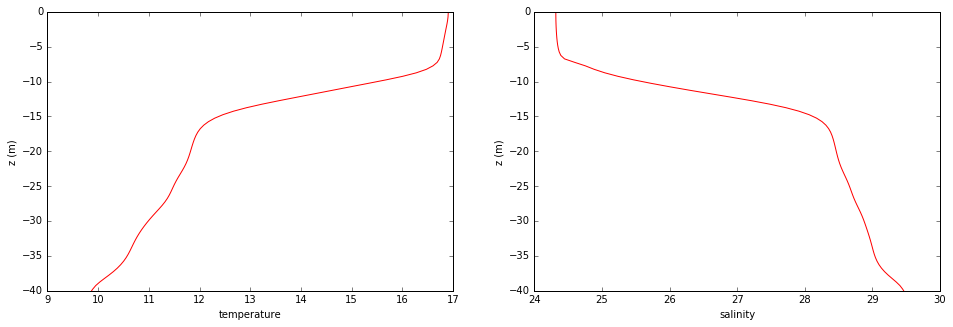

In [9]:
fig, axs = plt.subplots(1,2,figsize=(16,5))

iii=1
pl0=axs[0].plot(da[:,iii,0],-z,color='r')
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel(field_names[iii])


# Sal
iii=2
pl0=axs[1].plot(da[:,iii,0],-z,'-',color='r')
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel(field_names[iii])


Load SS2DSOG nuts & bio data:

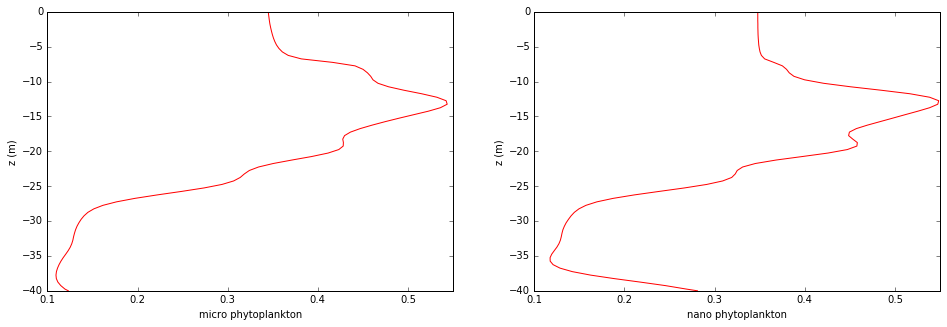

In [10]:
fig, axs = plt.subplots(1,2,figsize=(16,5))

iii=4
pl0=axs[0].plot(da[:,iii,0],-z,color='r')
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel(field_names[iii])


# Sal
iii=5
pl0=axs[1].plot(da[:,iii,0],-z,'-',color='r')
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel(field_names[iii])


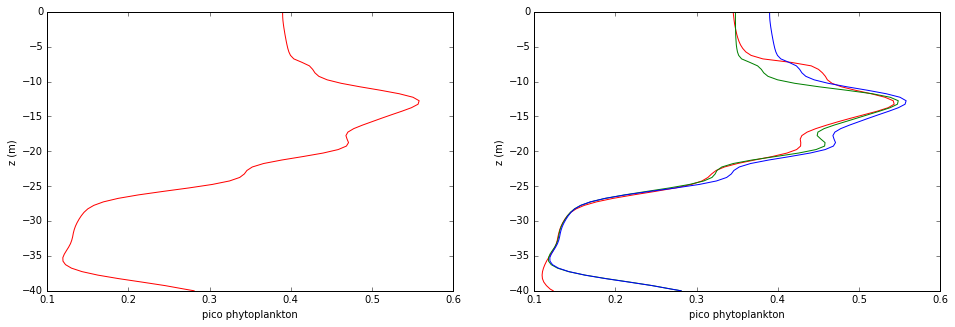

In [12]:
fig, axs = plt.subplots(1,2,figsize=(16,5))

iii=6
pl0=axs[0].plot(da[:,iii,0],-z,color='r')
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel(field_names[iii])


# Sal
pl0=axs[1].plot(da[:,4,0],-z,'-',color='r')
pl1=axs[1].plot(da[:,5,0],-z,'-',color='g')
pl2=axs[1].plot(da[:,6,0],-z,'-',color='b')
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel(field_names[iii])